In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\melb_data.csv\melb_data.csv"
data = pd.read_csv(url,parse_dates=["Date"])
data.head(3)

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0 2016-03-12       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1 2016-04-02       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2 2017-04-03       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  

[3 rows x 21 columns]

In [3]:
# vemos nullos
def show_nam_df(x):
    nulos = x.isnull().sum()
    col_nul = nulos[nulos > 0]
    col_por = round((col_nul / len(x)) * 100,2)
    df_nul = pd.DataFrame(data={"Total":col_nul,"Porcentaje":col_por})
    return df_nul

In [4]:
show_nam_df(data)

Total  Porcentaje
Car              62        0.46
BuildingArea   6450       47.50
YearBuilt      5375       39.58
CouncilArea    1369       10.08

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [6]:
# descripcion variables numericas
data.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [7]:
# descripcion variables categoricas
data.describe(include="object")

Suburb      Address   Type Method SellerG CouncilArea  \
count       13580        13580  13580  13580   13580       12211   
unique        314        13378      3      5     268          33   
top     Reservoir  28 Blair St      h      S  Nelson    Moreland   
freq          359            3   9449   9022    1565        1163   

                   Regionname  
count                   13580  
unique                      8  
top     Southern Metropolitan  
freq                     4695

In [8]:
# Vamos a trabajar con una copia, sin las columnas con mas nan ( son demasiados)
cols_remove = ["BuildingArea","YearBuilt"]
data_remove = data.copy().drop(cols_remove,axis=1)


In [9]:
# distribucion por tipo de casa (incluyo el porcentaje sobre el total en el dataset)
# quito postcode y latitude porque no me interesa
type_remove = ["Postcode","Lattitude","Longtitude"]
type_porcentaje = round(data_remove.groupby("Type").size() / len(data) * 100,2)
type_df = data_remove.drop(type_remove,axis=1).groupby("Type").mean()
type_df["Percentage"] = type_porcentaje.values
type_df.sort_values(by="Percentage",ascending=False)

Rooms         Price   Distance  Bedroom2  Bathroom       Car  \
Type                                                                    
h     3.260874  1.242665e+06  10.979479  3.229336  1.613822  1.771222   
u     1.963871  6.051275e+05   7.607391  1.966523  1.183295  1.128358   
t     2.837522  9.337351e+05   9.851346  2.814183  1.809695  1.555655   

        Landsize  Propertycount  Percentage  
Type                                         
h     617.181924    7259.025505       69.58  
u     477.314219    8199.280080       22.22  
t     279.606822    7094.459605        8.20

In [10]:
# describe por region name ( puedo hacer lo mismo con suburbios pero son demasidos)
region_porcentaje = round(data_remove.groupby("Regionname").size() / len(data) *100,2)
region_df = data_remove.drop(type_remove,axis=1).groupby("Regionname").mean()
region_df["Percentage"] = region_porcentaje.values
region_df.sort_values(by="Percentage",ascending=False)

Rooms         Price   Distance  Bedroom2  \
Regionname                                                                
Southern Metropolitan       2.860916  1.372963e+06   8.756656  2.835144   
Northern Metropolitan       2.755527  8.981711e+05   8.078329  2.734190   
Western Metropolitan        3.023406  8.664205e+05  10.104579  2.990502   
Eastern Metropolitan        3.322230  1.104080e+06  13.901088  3.313392   
South-Eastern Metropolitan  3.360000  9.229438e+05  23.813556  3.355556   
Eastern Victoria            3.396226  6.999808e+05  34.209434  3.396226   
Northern Victoria           3.560976  5.948293e+05  33.748780  3.560976   
Western Victoria            3.406250  3.975234e+05  30.753125  3.406250   

                            Bathroom       Car     Landsize  Propertycount  \
Regionname                                                                   
Southern Metropolitan       1.624068  1.576264   509.252183    7622.279233   
Northern Metropolitan       1.367866  1.454123   568.948072    9485.602057   
Western Metropolitan        1.501018  1.696392   493.606852    5561.785957   
Eastern Metropolitan        1.698844  1.792916   634.133923    5713.788579   
South-Eastern Metropolitan  1.657778  2.044444   613.991111    6589.366667   
Eastern Victoria            1.811321  2.056604  2949.698113    8872.358491   
Northern Victoria           1.853659  1.925000  3355.463415    4260.975610   
Western Victoria            1.468750  1.843750   655.500000    4191.156250   

                            Percentage  
Regionname                              
Southern Metropolitan            34.57  
Northern Metropolitan            28.65  
Western Metropolitan             21.71  
Eastern Metropolitan             10.83  
South-Eastern Metropolitan        3.31  
Eastern Victoria                  0.39  
Northern Victoria                 0.30  
Western Victoria                  0.24

In [12]:
def describe_porcentaje(data,column):
    region_porcentaje = round(data.groupby(column).size() / len(data) *100,2)
    region_df = data.drop(type_remove,axis=1).groupby(column).mean()
    region_df["Percentage"] = region_porcentaje.values
    return region_df.sort_values(by="Percentage",ascending=False)

In [13]:
describe_porcentaje(data_remove,"Method")

Rooms         Price   Distance  Bedroom2  Bathroom       Car  \
Method                                                                    
S       2.941809  1.087327e+06  10.431523  2.914875  1.498781  1.602581   
SP      2.795655  8.998924e+05  10.374692  2.785672  1.456254  1.560472   
PI      3.077366  1.133242e+06   9.482097  3.062660  1.714194  1.703918   
VB      2.924103  1.166510e+06   8.273728  2.896580  1.675563  1.602359   
SA      3.010870  1.025772e+06  12.385870  3.010870  1.554348  1.769231   

          Landsize  Propertycount  Percentage  
Method                                         
S       531.129905    7496.049435       66.44  
SP      469.346447    7093.759248       12.54  
PI      521.682864    7749.644501       11.52  
VB      927.331943    7307.331943        8.83  
SA      699.532609    6945.902174        0.68

### modelo

In [14]:
data_remove.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [15]:
cols_remove_model = ["Postcode","Lattitude","Longtitude","Suburb","Address",'Method','SellerG']

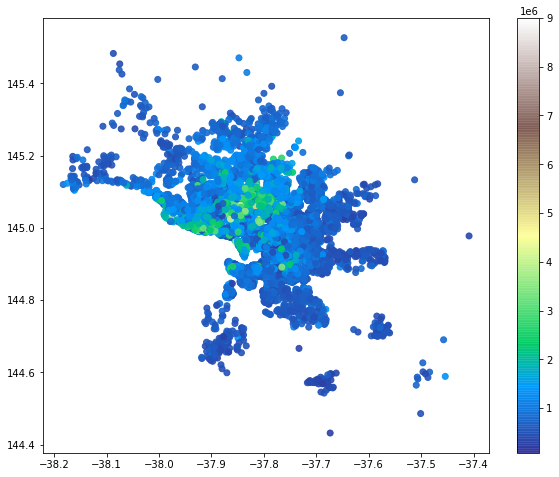

In [16]:
cmap = sns.color_palette("ch:s=-.2,r=.6")
plt.figure(figsize=(10,8))
plt.scatter(x="Lattitude",y="Longtitude",data=data_remove,c="Price", alpha=0.9,cmap='terrain')
plt.colorbar()

### experimentos con datetime

In [17]:
# calcular numero dias desde venta (no lo usaremos porque no estamos seguro de que hacer con ellos)
from datetime import date

In [18]:
pd.to_datetime(date.today()) - data_remove['Date']

0       1733 days
1       1712 days
2       1346 days
3       1346 days
4       1708 days
           ...   
13575   1201 days
13576   1201 days
13577   1201 days
13578   1201 days
13579   1201 days
Name: Date, Length: 13580, dtype: timedelta64[ns]

# usando days con sequimos extraemos el dia en el formato datetime


In [20]:
days_sold = (pd.to_datetime(date.today()) - data_remove['Date']).dt.days.astype("int")

In [21]:
days_sold

0        1733
1        1712
2        1346
3        1346
4        1708
         ... 
13575    1201
13576    1201
13577    1201
13578    1201
13579    1201
Name: Date, Length: 13580, dtype: int32

In [22]:
# vemos que no influye mucho los dias pasado desde la venta respecto al precio

Text(0, 0.5, 'precio')

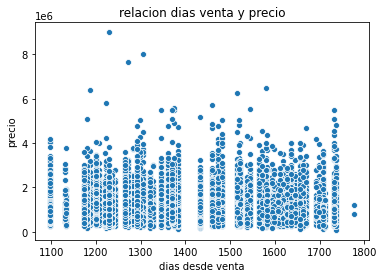

In [23]:
sns.scatterplot(x=days_sold.to_numpy(),y=data_remove.Price.to_numpy())
plt.title("relacion dias venta y precio")
plt.xlabel("dias desde venta")
plt.ylabel("precio")

### modelo ahora si

In [24]:
data_remove.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [25]:
cols_remove_model = ["Postcode","Lattitude","Longtitude","Suburb","Address",'Method','SellerG',"Date"]

In [26]:
data_model = data_remove.copy().drop(cols_remove_model,axis=1)


In [27]:
data_model.head(3)

Rooms Type      Price  Distance  Bedroom2  Bathroom  Car  Landsize  \
0      2    h  1480000.0       2.5       2.0       1.0  1.0     202.0   
1      2    h  1035000.0       2.5       2.0       1.0  0.0     156.0   
2      3    h  1465000.0       2.5       3.0       2.0  0.0     134.0   

  CouncilArea             Regionname  Propertycount  
0       Yarra  Northern Metropolitan         4019.0  
1       Yarra  Northern Metropolitan         4019.0  
2       Yarra  Northern Metropolitan         4019.0

In [28]:
X = data_model.drop("Price",axis=1)
y = data_model["Price"]

In [29]:
show_nam_df(data_model)

Total  Porcentaje
Car             62        0.46
CouncilArea   1369       10.08

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Step 1: Define Preprocessing Steps¶
Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:

In [31]:
categorical_cols=[x for x in data_model.columns.values if data_model[x].dtype == "object"]
numerical_cols = [x for x in X.columns.values if x not in categorical_cols]

In [32]:
# prepocesing numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])
# prepocesing categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Step 2: Define the Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
def pipeline_score(X_train, X_test, y_train, y_test,model):

    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])

    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = my_pipeline.predict(X_test)

    # Evaluate the model
    score = my_pipeline.score(X_train, y_train)
    score_test = my_pipeline.score(X_test,y_test)
    print('train score:', score)
    print('test score:', score_test)

In [35]:
pipeline_score(X_train, X_test, y_train, y_test,LinearRegression())

train score: 0.6088269295180739
test score: 0.628998873233063


In [36]:
from sklearn.ensemble import RandomForestRegressor
pipeline_score(X_train, X_test, y_train, y_test,RandomForestRegressor(max_depth=10, min_samples_leaf=2,random_state=0,n_estimators=200))

train score: 0.8655992110568813
test score: 0.7808198650878115


In [37]:
### tenemos que remover outliers despues del prepocesado(solo numerico ¡¡¡) o antes si usamos manual

In [38]:
# outliers
from sklearn.ensemble import IsolationForest

def outliers(X_train,y_train):
    #outliers
    iso = IsolationForest(contamination=0.1)
    yhat = iso.fit_predict(X_train)

    # select all rows that are not outliers
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    return X_train, y_train



In [39]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline_score(X_train, X_test, y_train, y_test,GradientBoostingRegressor(random_state=0,n_estimators=100,max_features='sqrt',max_depth=10))

train score: 0.9494650861901665
test score: 0.8014877171813937


### separar por modulos mejor para que no sea tan lento

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
def pipeline_score_bestcv(X_train, X_test, y_train, y_test,model):

    #param
    random_grid = { "model__max_depth": [10, 20, 30, 40],
                    'model__max_features': ['auto', 'sqrt'],
                    'model__min_samples_leaf': [1, 2, 4],
                    'model__min_samples_split': [2, 5, 10],
                    'model__n_estimators': [50,100,200, 400]}

    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])
    # kfold
    kfold = StratifiedKFold(n_splits=4,random_state=0)
    #grid
    grid = GridSearchCV(estimator=my_pipeline, param_grid=random_grid, n_jobs=-1, cv=kfold)
    grid_result = grid.fit(X_train, y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    print(f"mean test score: {means}")
  

In [41]:
pipeline_score_bestcv(X_train, X_test, y_train, y_test,GradientBoostingRegressor(random_state=0))

NameError: name 'kfol' is not defined

In [ ]:
### xboost o ligh